#### Atividade Fuzzy

Imagine que um fazendeiro planeja contratar um técnico para que ele automatize o sistema de irrigação de sua fazenda.

<br>
<img src='images/fazenda.jpg' width= 500px>

Este técnico planeja utilizar sistemas fuzzy para isso.

Para isso é importante levar em consideração 2 fatores para a construção desse modelo, a **umidade do solo** e a **temperatura do ar**.
Com isso, será possível usar um sistema fuzzy para saber a **duração da irrigação.**


#### Conjunto de regras

O técnico montou um conjunto de regras para fazer a inferência de seu sistema:

    Se a umidade do solo é baixa e a temperatura do ar é baixa, então a duração da irrigação deve ser média.

    Se a umidade do solo é baixa e a temperatura do ar é média, então a duração da irrigação deve ser longa.

    Se a umidade do solo é baixa e a temperatura do ar é alta, então a duração da irrigação deve ser longa.

    Se a umidade do solo é média e a temperatura do ar é baixa, então a duração da irrigação deve ser curta.

    Se a umidade do solo é média e a temperatura do ar é média, então a duração da irrigação deve ser média.

    Se a umidade do solo é média e a temperatura do ar é alta, então a duração da irrigação deve ser longa.

    Se a umidade do solo é alta e a temperatura do ar é baixa, então a duração da irrigação deve ser curta.

    Se a umidade do solo é alta e a temperatura do ar é média, então a duração da irrigação deve ser curta.

    Se a umidade do solo é alta e a temperatura do ar é alta, então a duração da irrigação deve ser média.

#### Funções de Pertinência

##### Antecedentes

<img src='images/umidade.png' width= 300px>
<img src='images/temperatura.png'width= 300px>

##### Consequentes

<img src='images/duracao.png' width= 300px>

##### Construa o sistema que o técnico imaginou

In [16]:
# comando para instalar a biblioteca necessária
#%pip install scikit-fuzzy

# importação das bibliotecas necessárias
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedentes (entrada/input)

In [17]:
# Definindo universo de discurso para umidade do solo e temperatura do ar
universo_umidade = np.arange(0, 11, 1)
universo_temperatura = np.arange(0, 11, 1)
universo_duracao = np.arange(0, 11, 1)

# Criando os antecedentes
umidade_solo = control.Antecedent(universe=universo_umidade, label="umidade_solo")
temperatura_ar = control.Antecedent(universe=universo_temperatura, label="temperatura_ar")

# Definindo funções de pertinência para umidade do solo
umidade_solo["baixa"] = fuzzy.trapmf(umidade_solo.universe, [0, 0, 2, 5])
umidade_solo["media"] = fuzzy.trimf(umidade_solo.universe, [3, 5, 7])
umidade_solo["alta"] = fuzzy.trapmf(umidade_solo.universe, [5, 8, 10, 10])

# Definindo funções de pertinência para temperatura do ar
temperatura_ar["baixa"] = fuzzy.trapmf(temperatura_ar.universe, [0, 0, 2, 5])
temperatura_ar["media"] = fuzzy.trimf(temperatura_ar.universe, [3, 5, 7])
temperatura_ar["alta"] = fuzzy.trapmf(temperatura_ar.universe, [5, 8, 10, 10])

#### Criando consequent (saída/output)

In [18]:
# Criando o consequente
duracao_irrigacao = control.Consequent(universe=universo_duracao, label="duracao_irrigacao")

# Definindo funções de pertinência para duração da irrigação
duracao_irrigacao["curta"] = fuzzy.trapmf(duracao_irrigacao.universe, [0, 0, 2, 5])
duracao_irrigacao["media"] = fuzzy.trimf(duracao_irrigacao.universe, [3, 5, 7])
duracao_irrigacao["longa"] = fuzzy.trapmf(duracao_irrigacao.universe, [5, 8, 10, 10])

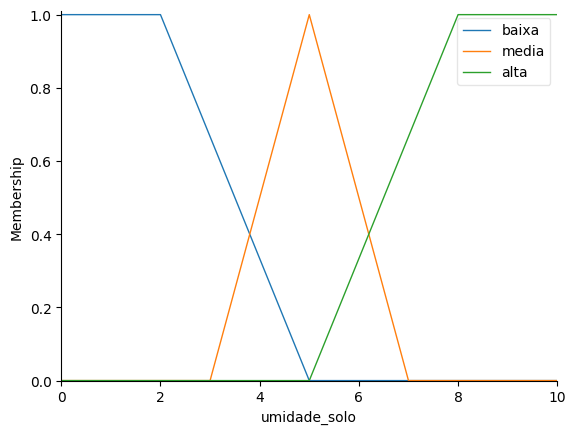

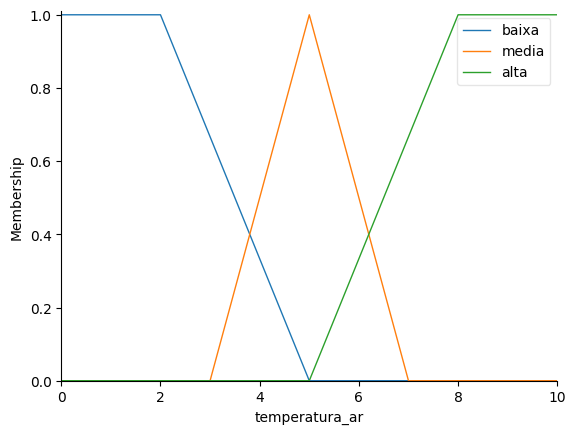

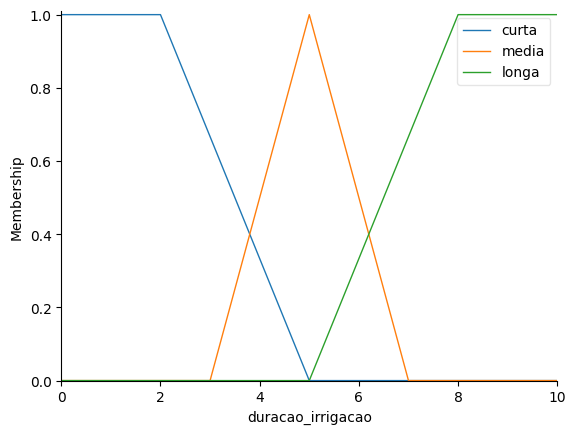

In [19]:
# Visualizando as funções de pertinência
umidade_solo.view()
temperatura_ar.view()
duracao_irrigacao.view()

#### Criando regras

In [20]:
# Definindo as regras
regra1 = control.Rule(umidade_solo['baixa'] & temperatura_ar['baixa'], duracao_irrigacao['media'])
regra2 = control.Rule(umidade_solo['baixa'] & temperatura_ar['media'], duracao_irrigacao['longa'])
regra3 = control.Rule(umidade_solo['baixa'] & temperatura_ar['alta'], duracao_irrigacao['longa'])
regra4 = control.Rule(umidade_solo['media'] & temperatura_ar['baixa'], duracao_irrigacao['curta'])
regra5 = control.Rule(umidade_solo['media'] & temperatura_ar['media'], duracao_irrigacao['media'])
regra6 = control.Rule(umidade_solo['media'] & temperatura_ar['alta'], duracao_irrigacao['longa'])
regra7 = control.Rule(umidade_solo['alta'] & temperatura_ar['baixa'], duracao_irrigacao['curta'])
regra8 = control.Rule(umidade_solo['alta'] & temperatura_ar['media'], duracao_irrigacao['curta'])
regra9 = control.Rule(umidade_solo['alta'] & temperatura_ar['alta'], duracao_irrigacao['media'])


#### Criando sistema

Duração da irrigação: 5.0


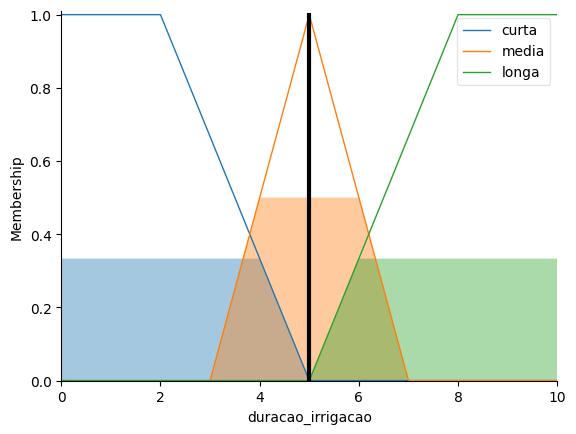

In [21]:
# Criando o sistema de controle fuzzy
sistema_controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

# Criando a simulação do sistema de controle
simulacao = control.ControlSystemSimulation(sistema_controle)

# Exemplo de uso
# Ajustando valores de entrada
simulacao.input['umidade_solo'] = 4     # Exemplo de valor para umidade do solo
simulacao.input['temperatura_ar'] = 4   # Exemplo de valor para temperatura do ar

# Realizando a simulação
simulacao.compute()

# Obtendo o resultado
print(f"Duração da irrigação: {simulacao.output['duracao_irrigacao']}")
duracao_irrigacao.view(sim=simulacao)